### **IMPORT LIBRARIES**

In [ ]:
# Import library yang diperlukan
import re  # Modul untuk ekspresi reguler (regex) 
import nltk  # Modul untuk Natural Language Toolkit (NLP)
from nltk.corpus import stopwords  # Korpus stopwords dari nltk
from nltk.stem import PorterStemmer  # Stemmer Porter untuk mengurangi kata ke bentuk dasarnya
from sentence_transformers import SentenceTransformer  # Untuk menggunakan model SentenceTransformers
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi training dan test set
from sklearn.metrics import classification_report  # Untuk menghitung metrik klasifikasi
from sklearn.multioutput import MultiOutputClassifier  # Untuk menangani klasifikasi multi-output
from sklearn.neighbors import KNeighborsClassifier  # Klasifikasi menggunakan KNN (K-Nearest Neighbors)
import pandas as pd  # Untuk manipulasi data dan analisis
import numpy as np  # Untuk komputasi numerik
from tqdm import tqdm  # Untuk menampilkan progress bar saat iterasi
import matplotlib.pyplot as plt  # Untuk visualisasi data dalam bentuk plot
import seaborn as sns  # Untuk visualisasi data berbasis seaborn
from transformers import BertTokenizer, BertModel  # Untuk menggunakan model BERT dan tokenizer
import torch  # Untuk komputasi tensor dengan PyTorch (terutama untuk deep learning)
import warnings  # Modul untuk menangani warning
from pathlib import Path  # Untuk manipulasi file dan path
from sklearn.ensemble import RandomForestClassifier  # Model Random Forest untuk klasifikasi
import lightgbm as lgb  # Model LightGBM untuk klasifikasi atau regresi
from sklearn.metrics import classification_report  # Untuk menghitung metrik klasifikasi (lagi)
from sklearn.multioutput import MultiOutputClassifier  # Menangani klasifikasi multi-output (lagi)
from sklearn.metrics import classification_report  # Menghitung hasil laporan klasifikasi (terulang)
import seaborn as sns # Mengimpor pustaka seaborn untuk visualisasi data statistik
from wordcloud import WordCloud # Mengimpor WordCloud untuk membuat visualisasi word cloud
from nltk.tokenize import word_tokenize # Mengimpor word_tokenize dari nltk.tokenize untuk memecah teks menjadi token (kata)

# Menonaktifkan warning yang tidak relevan agar output tidak terlalu berantakan
warnings.simplefilter(action='ignore', category=UserWarning)

# Pastikan stopwords dari NLTK sudah di-download untuk memproses teks
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [2]:
# Menentukan lokasi file CSV yang ingin dibaca
file_path = r'C:\Users\Michelle\Downloads\Semester 5\Analisis Big Data\classification_train\train.csv'

# Membaca file CSV dan memuatnya ke dalam DataFrame (sejenis tabel) pandas
data = pd.read_csv(file_path)


In [3]:
data.head(2)

,title,abstract,InformationTheory,ComputationalLinguistics,ComputerVision
0,Objective-Dependent Uncertainty Driven Retinal...,From diagnosing neovascular diseases to dete...,0,0,1
1,SMARTies: Sentiment Models for Arabic Target E...,We consider entity-level sentiment analysis ...,0,1,0


### **EDA**

In [4]:
# Menampilkan informasi tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   title                     125000 non-null  object
 1   abstract                  125000 non-null  object
 2   InformationTheory         125000 non-null  int64 
 3   ComputationalLinguistics  125000 non-null  int64 
 4   ComputerVision            125000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ MB


In [5]:
# Menghitung jumlah baris duplikat di dataset
data.duplicated().sum()

19

In [3]:
# Mendefinisikan nama-nama kolom target yang ingin dianalisis distribusinya
target_cols = ['InformationTheory', 'ComputationalLinguistics', 'ComputerVision']

# Menghitung jumlah dari setiap kategori untuk setiap kolom target
target_dist = data[target_cols].sum()


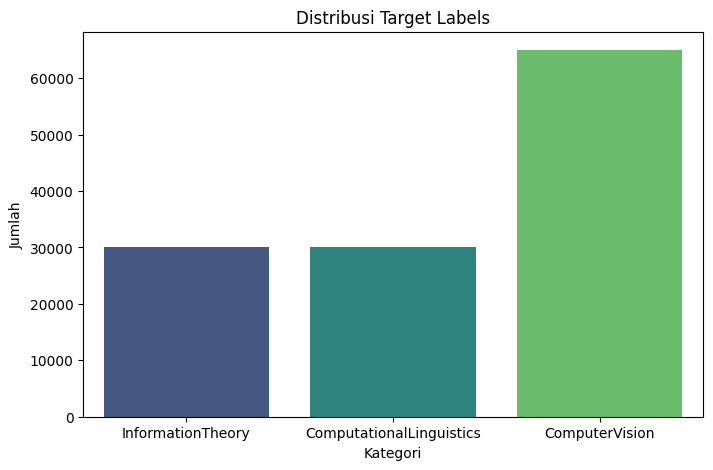

In [4]:
# Membuat figure atau gambar dengan ukuran tertentu (8 inci lebar dan 5 inci tinggi)
plt.figure(figsize=(8, 5))

# Membuat bar plot menggunakan seaborn untuk visualisasi distribusi data
# x = kategori target, y = jumlah dari masing-masing kategori, palette 'viridis' digunakan untuk warna
sns.barplot(x=target_dist.index, y=target_dist.values, palette='viridis')

# Menambahkan judul pada grafik
plt.title('Distribusi Target Labels')

# Menambahkan label pada sumbu X (kategori)
plt.xlabel('Kategori')

# Menambahkan label pada sumbu Y (jumlah)
plt.ylabel('Jumlah')

# Menampilkan plot yang sudah dibuat
plt.show()


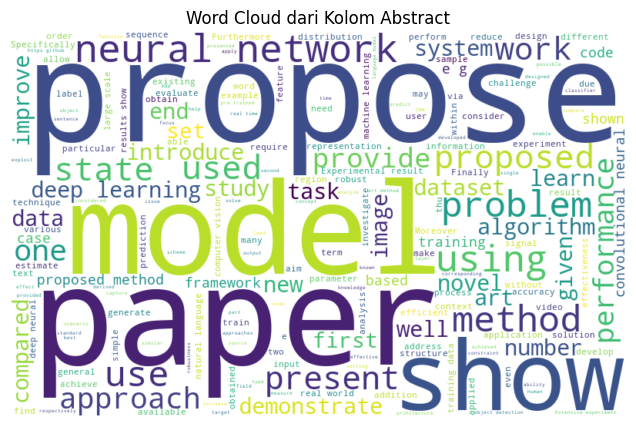

In [5]:
# Gabungkan seluruh teks dari kolom 'abstract' menjadi satu string
text = ' '.join(data['abstract'])

# Membuat word cloud
wordcloud = WordCloud(width=800, height=500, background_color='white', colormap='viridis').generate(text)

# Menampilkan word cloud
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menghilangkan sumbu
plt.title('Word Cloud dari Kolom Abstract')

# Menampilkan plot
plt.show()

In [ ]:
# Menghitung jumlah nilai pada setiap kolom target
target_dist = data[target_cols].sum()

# Memeriksa apakah terdapat nilai null (NaN) dalam distribusi target
if target_dist.isnull().any():
    print("Terdapat nilai null pada distribusi target.")


### **DATA PREPROCESSING**

In [9]:
# Menghapus baris duplikat dari dataset
data_cleaned = data.drop_duplicates()

# Hapus kolom 'title' dan hanya menggunakan 'abstract' untuk kolom 'text'
data_cleaned['text'] = data_cleaned['abstract']

# Hapus kolom 'title' karena sudah tidak diperlukan
data_cleaned.drop(columns='title', inplace=True)


C:\Users\Michelle\AppData\Local\Temp\ipykernel_10244\2546453223.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['text'] = data_cleaned['abstract']
C:\Users\Michelle\AppData\Local\Temp\ipykernel_10244\2546453223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns='title', inplace=True)


In [10]:
data.abstract.values

array(['  From diagnosing neovascular diseases to detecting white matter lesions\naccurate tiny vessel segmentation in fundus images is critical. Promising\nresults for accurate vessel segmentation have been known. However their\neffectiveness in segmenting tiny vessels is still limited. In this paper we\nstudy retinal vessel segmentation by incorporating tiny vessel segmentation\ninto our framework for the overall accurate vessel segmentation. To achieve\nthis we propose a new deep convolutional neural network (CNN) which divides\nvessel segmentation into two separate objectives. Specifically we consider the\noverall accurate vessel segmentation and tiny vessel segmentation as two\nindividual objectives. Then by exploiting the objective-dependent\n(homoscedastic) uncertainty we enable the network to learn both objectives\nsimultaneously. Further to improve the individual objectives we propose: (a)\na vessel weight map based auxiliary loss for enhancing tiny vessel connectivity\n(i.e. 

In [11]:
# Data cleaning dan preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text_advanced_english(text):
    # Hapus URL dan emoji
    text = re.sub(r'http\S+|[\U00010000-\U0010ffff]', '', text)
    
    # Hapus simbol dan angka
    text = re.sub(r'[^\w\s]', '', text)
    
    # Hapus huruf berulang lebih dari 2 kali
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    
    # Ubah ke huruf kecil
    text = text.lower()
    
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Hapus stopwords dan lakukan stemming
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    
    return text

# Terapkan fungsi pembersihan ke kolom abstract
data_cleaned['cleaned_abstract'] = data_cleaned['abstract'].apply(clean_text_advanced_english)


C:\Users\Michelle\AppData\Local\Temp\ipykernel_10244\975998132.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['cleaned_abstract'] = data_cleaned['abstract'].apply(clean_text_advanced_english)


In [ ]:
print(data_cleaned['cleaned_abstract'].head(3))

0    diagnos neovascular diseas detect white matter...
1    consid entitylevel sentiment analysi arab morp...
2    work address task semisupervis video object se...
Name: cleaned_abstract, dtype: object


In [ ]:
# Memuat pre-trained model dari Sentence Transformers
try:
    # Memuat model pre-trained 'all-MiniLM-L6-v2' dari Sentence Transformers
    model = SentenceTransformer("all-MiniLM-L6-v2")
    
    # Memastikan model menggunakan GPU jika tersedia, jika tidak menggunakan CPU
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.to(device)  # Memindahkan model ke perangkat yang sesuai (GPU atau CPU)
except Exception as e:
    # Menangani error jika model gagal dimuat
    print(f"Error loading model: {e}")
    model = None  # Jika terjadi error, set model menjadi None

# Fungsi untuk memproses dalam batch
def encode_batch(texts, batch_size=128):
    embeddings = []  # List untuk menampung embeddings
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]  # Ambil batch data
        batch_embeddings = model.encode(batch, show_progress_bar=False, device=device)  # Dapatkan embeddings dari model
        
        # Memeriksa dimensi setiap embedding
        if len(batch_embeddings.shape) != 2 or batch_embeddings.shape[1] != model.get_sentence_embedding_dimension():
            print(f"Warning: Dimensi embedding tidak konsisten pada batch {i}")
            print(f"Dimensi yang ditemukan: {batch_embeddings.shape}")
        
        embeddings.extend(batch_embeddings)  # Gabungkan embeddings dari setiap batch
    return np.array(embeddings)  # Kembalikan embeddings dalam bentuk array numpy

# Fungsi untuk memproses data dalam chunk lebih kecil dan menyimpan sementara
def encode_in_chunks(texts, chunk_size=20000, batch_size=128):
    all_embeddings = []  # List untuk menyimpan embeddings dari semua chunk
    for i in tqdm(range(0, len(texts), chunk_size)):
        chunk = texts[i:i + chunk_size]  # Ambil chunk data
        embeddings = encode_batch(chunk, batch_size)  # Dapatkan embeddings untuk chunk ini
        all_embeddings.append(embeddings)  # Tambahkan embeddings ke list
        
        # Menyimpan sementara hasil embeddings setiap chunk untuk mencegah kehilangan data
        np.save(f'embeddings_chunk_{i // chunk_size}.npy', embeddings)
    
    # Menggabungkan semua embeddings dari chunk yang berbeda
    return np.concatenate(all_embeddings, axis=0)

# Pastikan tidak ada teks kosong atau hanya berisi spasi
texts = data_cleaned['cleaned_abstract'].dropna().values  # Mengambil teks yang sudah dibersihkan dan menghapus nilai null
texts = [text for text in texts if text.strip() != ""]  # Menghapus teks yang hanya berisi spasi

#  Menyusun embedding untuk teks pada kolom 'abstract' yang sudah dibersihkan dalam chunk
if model:
    # Jika model berhasil dimuat, proses teks menjadi embeddings dalam chunk
    X = encode_in_chunks(texts, chunk_size=20000, batch_size=128)
else:
    # Jika model gagal dimuat, set X menjadi None
    X = None

# Target untuk kolom 'InformationTheory', 'ComputationalLinguistics', 'ComputerVision'
Y = data_cleaned[['InformationTheory', 'ComputationalLinguistics', 'ComputerVision']].values


100%|██████████| 7/7 [42:08<00:00, 361.19s/it]


In [ ]:
# Memeriksa apakah X (embedding) tersedia
if X is not None:
    # Membagi data menjadi set pelatihan (training) dan set pengujian (test) dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
    
    # Menampilkan ukuran set pelatihan dan set pengujian
    print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")
else:
    # Jika X tidak tersedia (misalnya model gagal dimuat atau embeddings tidak berhasil dibuat)
    print("Error: Tidak ada embedding yang tersedia untuk data.")


Training set size: (99984, 384), Test set size: (24997, 384)


### **MODELING**

In [ ]:
# KNN Multi-Output
knn = KNeighborsClassifier(n_neighbors=3)  # Membuat model KNN dengan 3 tetangga terdekat
multi_target_knn = MultiOutputClassifier(knn)  # Membuat model MultiOutputClassifier untuk menangani klasifikasi multi-output
multi_target_knn.fit(X_train, Y_train)  # Melatih model dengan data pelatihan
Y_pred = multi_target_knn.predict(X_test)  # Memprediksi kelas untuk data pengujian

# Evaluation
print("Multi-Label Classification Report:")  # Mencetak judul laporan evaluasi
for i, label in enumerate(target_cols):  # Looping untuk setiap kolom target
    print(f"\nClassification report for {label}:")  # Menampilkan nama kolom target
    print(classification_report(Y_test[:, i], Y_pred[:, i], target_names=["Class 0", "Class 1"]))  # Menampilkan laporan klasifikasi


Multi-Label Classification Report:

Classification report for InformationTheory:
              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.98     18999
     Class 1       0.97      0.94      0.95      5998

    accuracy                           0.98     24997
   macro avg       0.97      0.96      0.97     24997
weighted avg       0.98      0.98      0.98     24997


Classification report for ComputationalLinguistics:
              precision    recall  f1-score   support

     Class 0       0.96      0.97      0.97     18997
     Class 1       0.91      0.89      0.90      6000

    accuracy                           0.95     24997
   macro avg       0.94      0.93      0.94     24997
weighted avg       0.95      0.95      0.95     24997


Classification report for ComputerVision:
              precision    recall  f1-score   support

     Class 0       0.95      0.92      0.94     11998
     Class 1       0.93      0.95      0.94     12999

    a

In [ ]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)  # Membuat model Random Forest dengan 100 pohon dan kedalaman maksimum 5

# Menggunakan MultiOutputClassifier untuk multi-output classification
multi_target_rf = MultiOutputClassifier(rf_model)  # Membungkus model Random Forest dengan MultiOutputClassifier agar bisa menangani lebih dari satu target

# Melatih model
multi_target_rf.fit(X_train, Y_train)  # Melatih model dengan data pelatihan (X_train dan Y_train)

# Prediksi pada data test
Y_pred = multi_target_rf.predict(X_test)  # Memperoleh prediksi untuk data uji (X_test)

# Evaluasi
print("Multi-Label Classification Report:")  # Menampilkan judul laporan evaluasi
for i, label in enumerate(target_cols):  # Melakukan iterasi untuk setiap kolom target
    print(f"\nClassification report for {label}:")  # Menampilkan nama kolom target
    print(classification_report(Y_test[:, i], Y_pred[:, i], target_names=["Class 0", "Class 1"]))  # Menampilkan laporan klasifikasi untuk target ke-i


Multi-Label Classification Report:

Classification report for InformationTheory:
              precision    recall  f1-score   support

     Class 0       0.94      0.99      0.96     18999
     Class 1       0.98      0.78      0.87      5998

    accuracy                           0.94     24997
   macro avg       0.96      0.89      0.92     24997
weighted avg       0.95      0.94      0.94     24997


Classification report for ComputationalLinguistics:
              precision    recall  f1-score   support

     Class 0       0.90      0.99      0.94     18997
     Class 1       0.95      0.66      0.77      6000

    accuracy                           0.91     24997
   macro avg       0.92      0.82      0.86     24997
weighted avg       0.91      0.91      0.90     24997


Classification report for ComputerVision:
              precision    recall  f1-score   support

     Class 0       0.91      0.90      0.90     11998
     Class 1       0.91      0.91      0.91     12999

    a

In [ ]:
# Inisialisasi model LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)

# Menggunakan MultiOutputClassifier untuk multi-output classification
multi_target_lgb = MultiOutputClassifier(lgb_model)

# Melatih model
multi_target_lgb.fit(X_train, Y_train)

# Prediksi pada data test
Y_pred = multi_target_lgb.predict(X_test)

# Evaluasi
print("Multi-Label Classification Report:")
for i, label in enumerate(target_cols):
    print(f"\nClassification report for {label}:")
    print(classification_report(Y_test[:, i], Y_pred[:, i], target_names=["Class 0", "Class 1"]))


[LightGBM] [Info] Number of positive: 23993, number of negative: 75991
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 99984, number of used features: 384
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.239968 -> initscore=-1.152853
[LightGBM] [Info] Start training from score -1.152853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [ ]:
# Setelah model dilatih dan prediksi dilakukan
Y_pred = multi_target_lgb.predict(X_test)

# Menampilkan Classification Report 
print("Classification report for InformationTheory:")
print(classification_report(Y_test[:, 0], Y_pred[:, 0], target_names=["Class 0", "Class 1"]))
print("="*80)

Classification report for InformationTheory:
              precision    recall  f1-score   support

     Class 0       0.98      0.98      0.98     18999
     Class 1       0.95      0.93      0.94      5998

    accuracy                           0.97     24997
   macro avg       0.96      0.96      0.96     24997
weighted avg       0.97      0.97      0.97     24997



In [28]:
print("Classification report for ComputationalLinguistics:")
print(classification_report(Y_test[:, 1], Y_pred[:, 1], target_names=["Class 0", "Class 1"]))
print("="*80)

Classification report for ComputationalLinguistics:
              precision    recall  f1-score   support

     Class 0       0.96      0.97      0.97     18997
     Class 1       0.92      0.88      0.90      6000

    accuracy                           0.95     24997
   macro avg       0.94      0.93      0.93     24997
weighted avg       0.95      0.95      0.95     24997



In [29]:
print("Classification report for ComputerVision:")
print(classification_report(Y_test[:, 2], Y_pred[:, 2], target_names=["Class 0", "Class 1"]))
print("="*80)

Classification report for ComputerVision:
              precision    recall  f1-score   support

     Class 0       0.93      0.93      0.93     11998
     Class 1       0.93      0.93      0.93     12999

    accuracy                           0.93     24997
   macro avg       0.93      0.93      0.93     24997
weighted avg       0.93      0.93      0.93     24997

